# Artificial Neural Network
### Apply ML algorithms
Linear Regression  
Lasso Regression  
Decision Tree Regressor  
KNN Regressor  
RandomForestRegressor  
Xgboost Regressor  
Huperparameter Tuning   
ANN- Artificial Neural Network 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('../Data/Real-Data/Real_Combine.csv')

In [8]:
df.shape

(775, 9)

<AxesSubplot: >

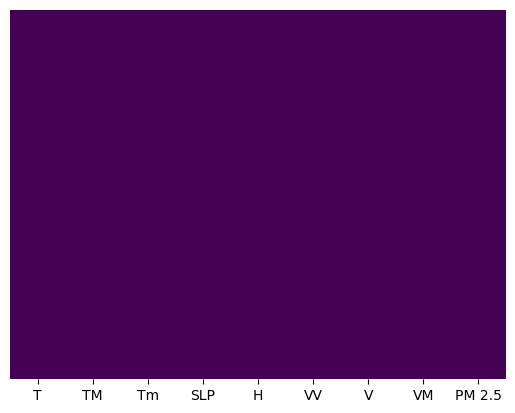

In [9]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df=df.dropna()

In [11]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [12]:
## check null values
X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
770,False,False,False,False,False,False,False,False
771,False,False,False,False,False,False,False,False
772,False,False,False,False,False,False,False,False
773,False,False,False,False,False,False,False,False


In [13]:
y.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
770    False
771    False
772    False
773    False
774    False
Name: PM 2.5, Length: 775, dtype: bool

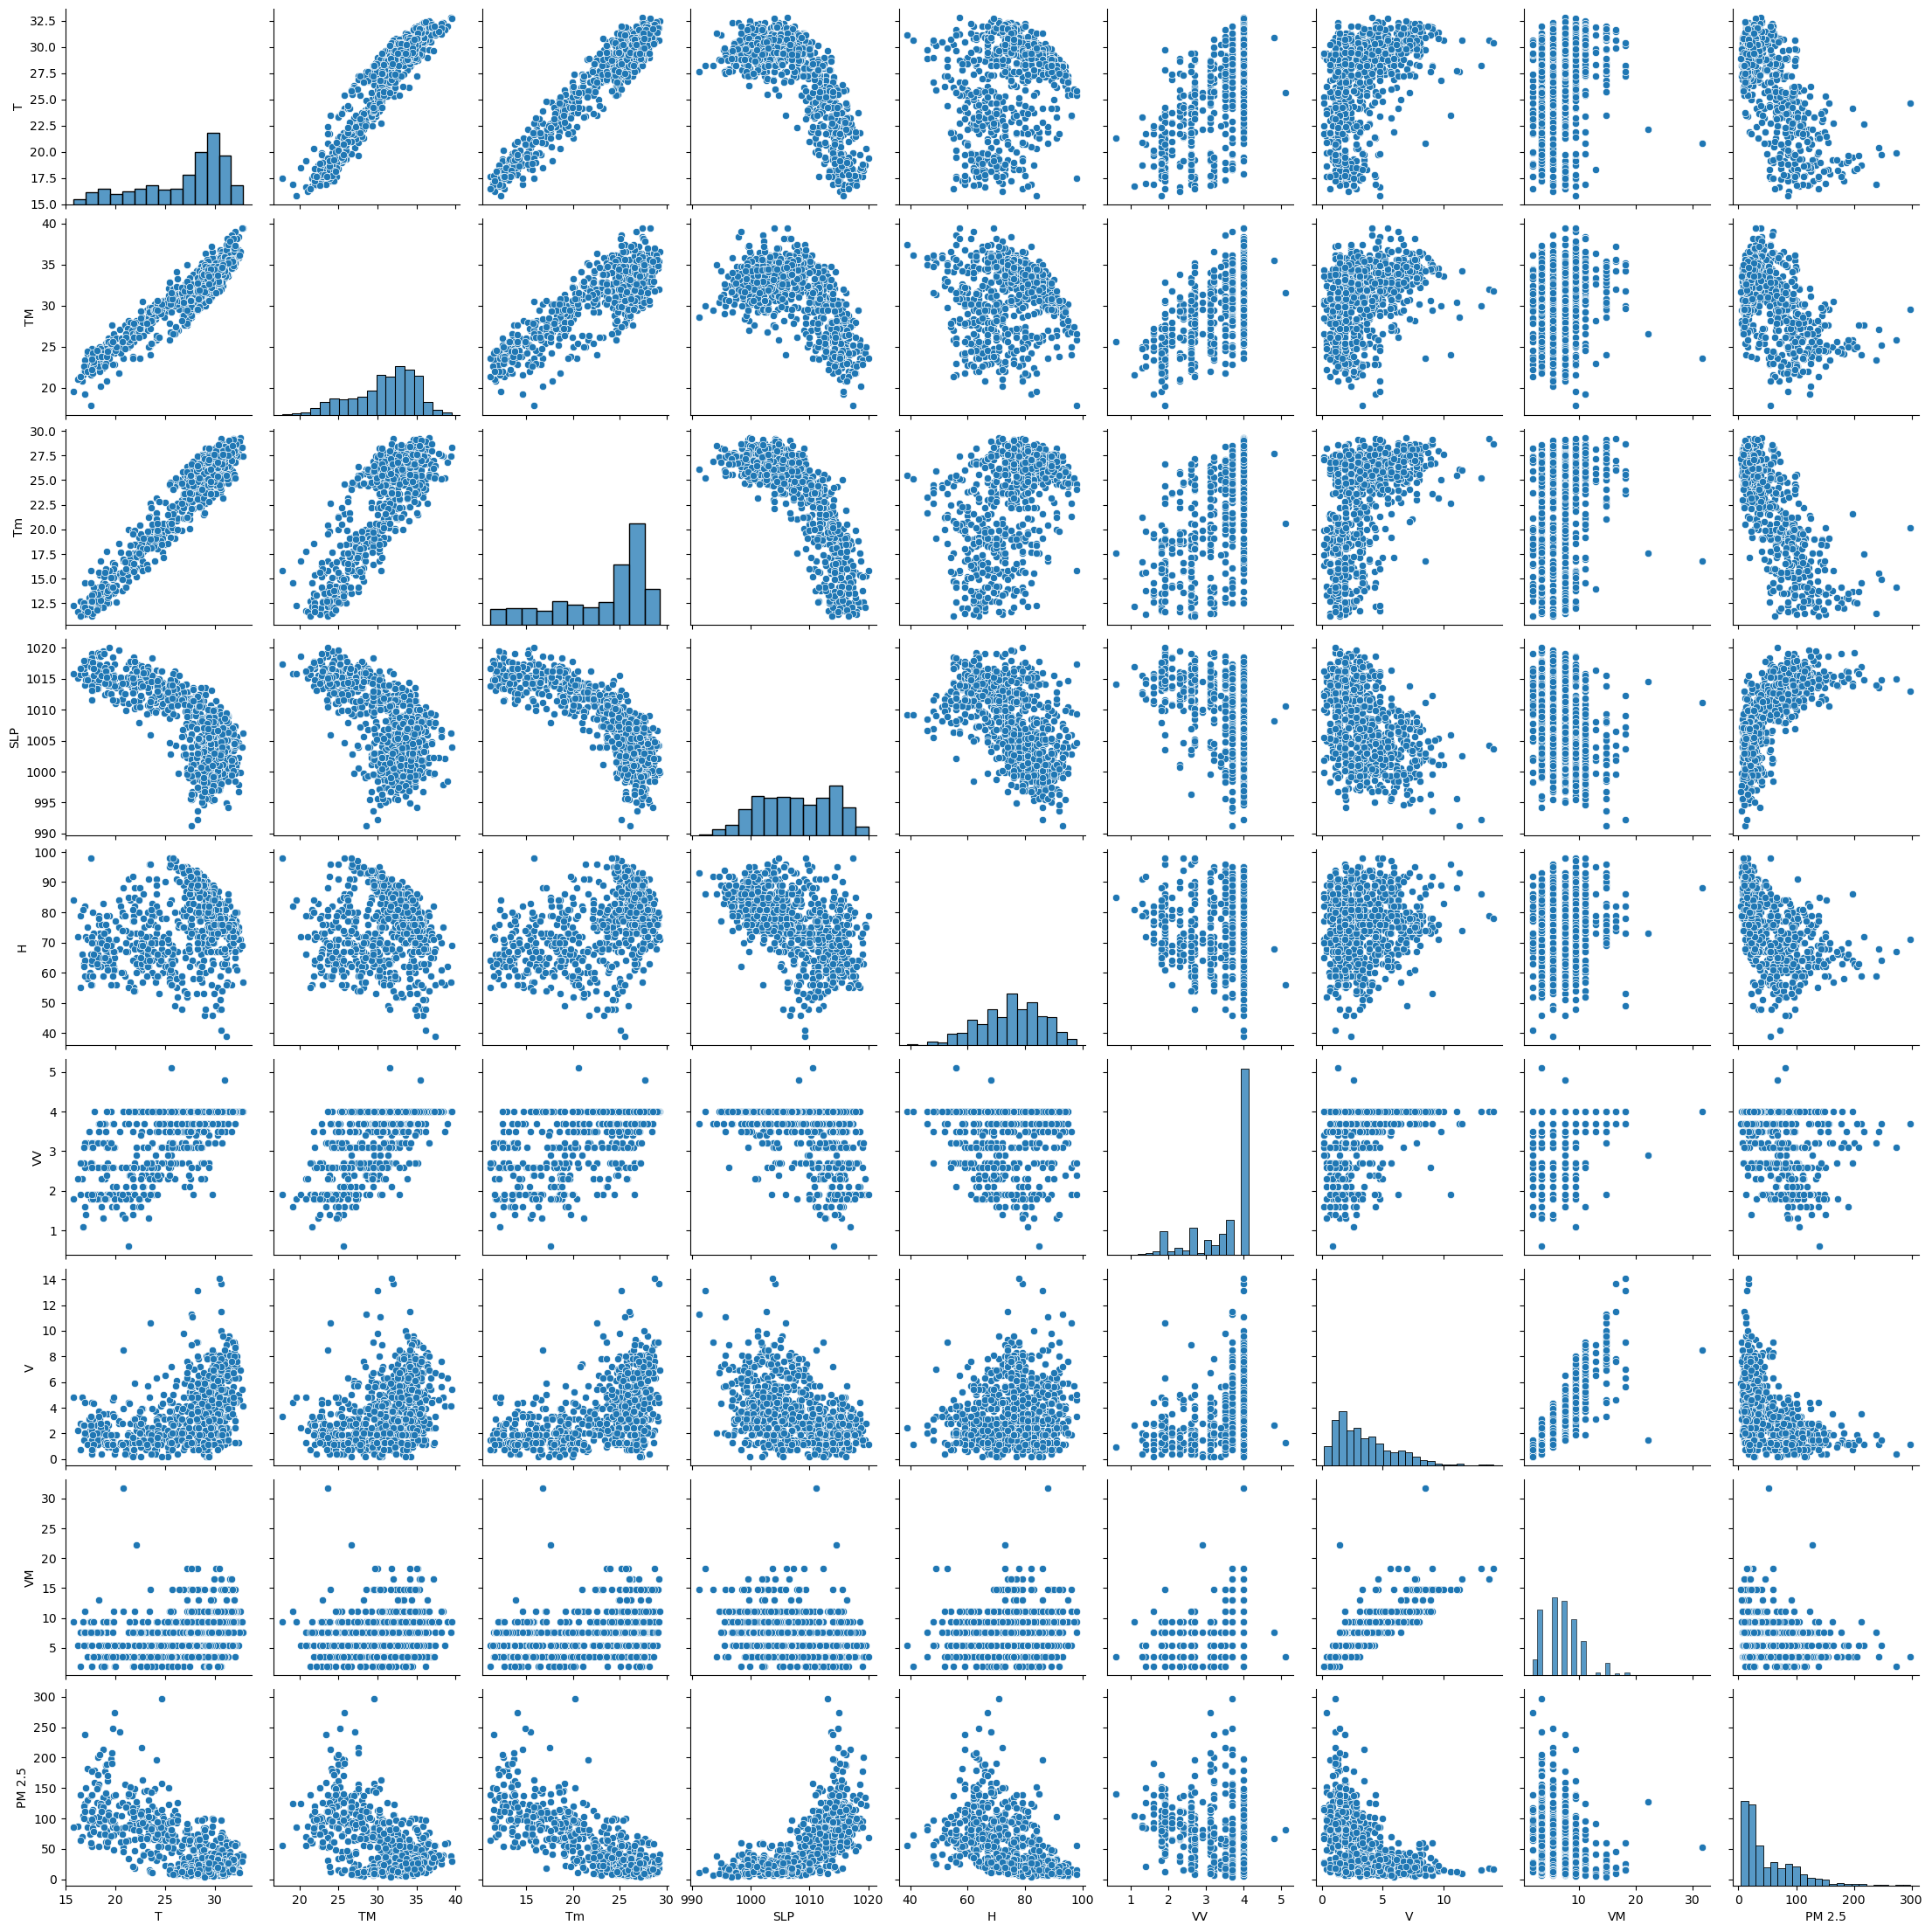

In [14]:
sns.pairplot(df)

In [15]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.935524,0.957816,-0.757420,0.266486,0.718663,0.437618,0.276918,-0.730732
TM,0.935524,1.000000,0.822246,-0.602902,-0.000672,0.694784,0.355071,0.221702,-0.559624
Tm,0.957816,0.822246,1.000000,-0.811434,0.462392,0.671069,0.441991,0.279698,-0.794618
SLP,-0.757420,-0.602902,-0.811434,1.000000,-0.541203,-0.563667,-0.450169,-0.292371,0.701662
H,0.266486,-0.000672,0.462392,-0.541203,1.000000,0.071798,0.164732,0.088698,-0.507403
VV,0.718663,0.694784,0.671069,-0.563667,0.071798,1.000000,0.388416,0.293956,-0.498137
V,0.437618,0.355071,0.441991,-0.450169,0.164732,0.388416,1.000000,0.827395,-0.446214
VM,0.276918,0.221702,0.279698,-0.292371,0.088698,0.293956,0.827395,1.000000,-0.310336
PM 2.5,-0.730732,-0.559624,-0.794618,0.701662,-0.507403,-0.498137,-0.446214,-0.310336,1.000000


### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

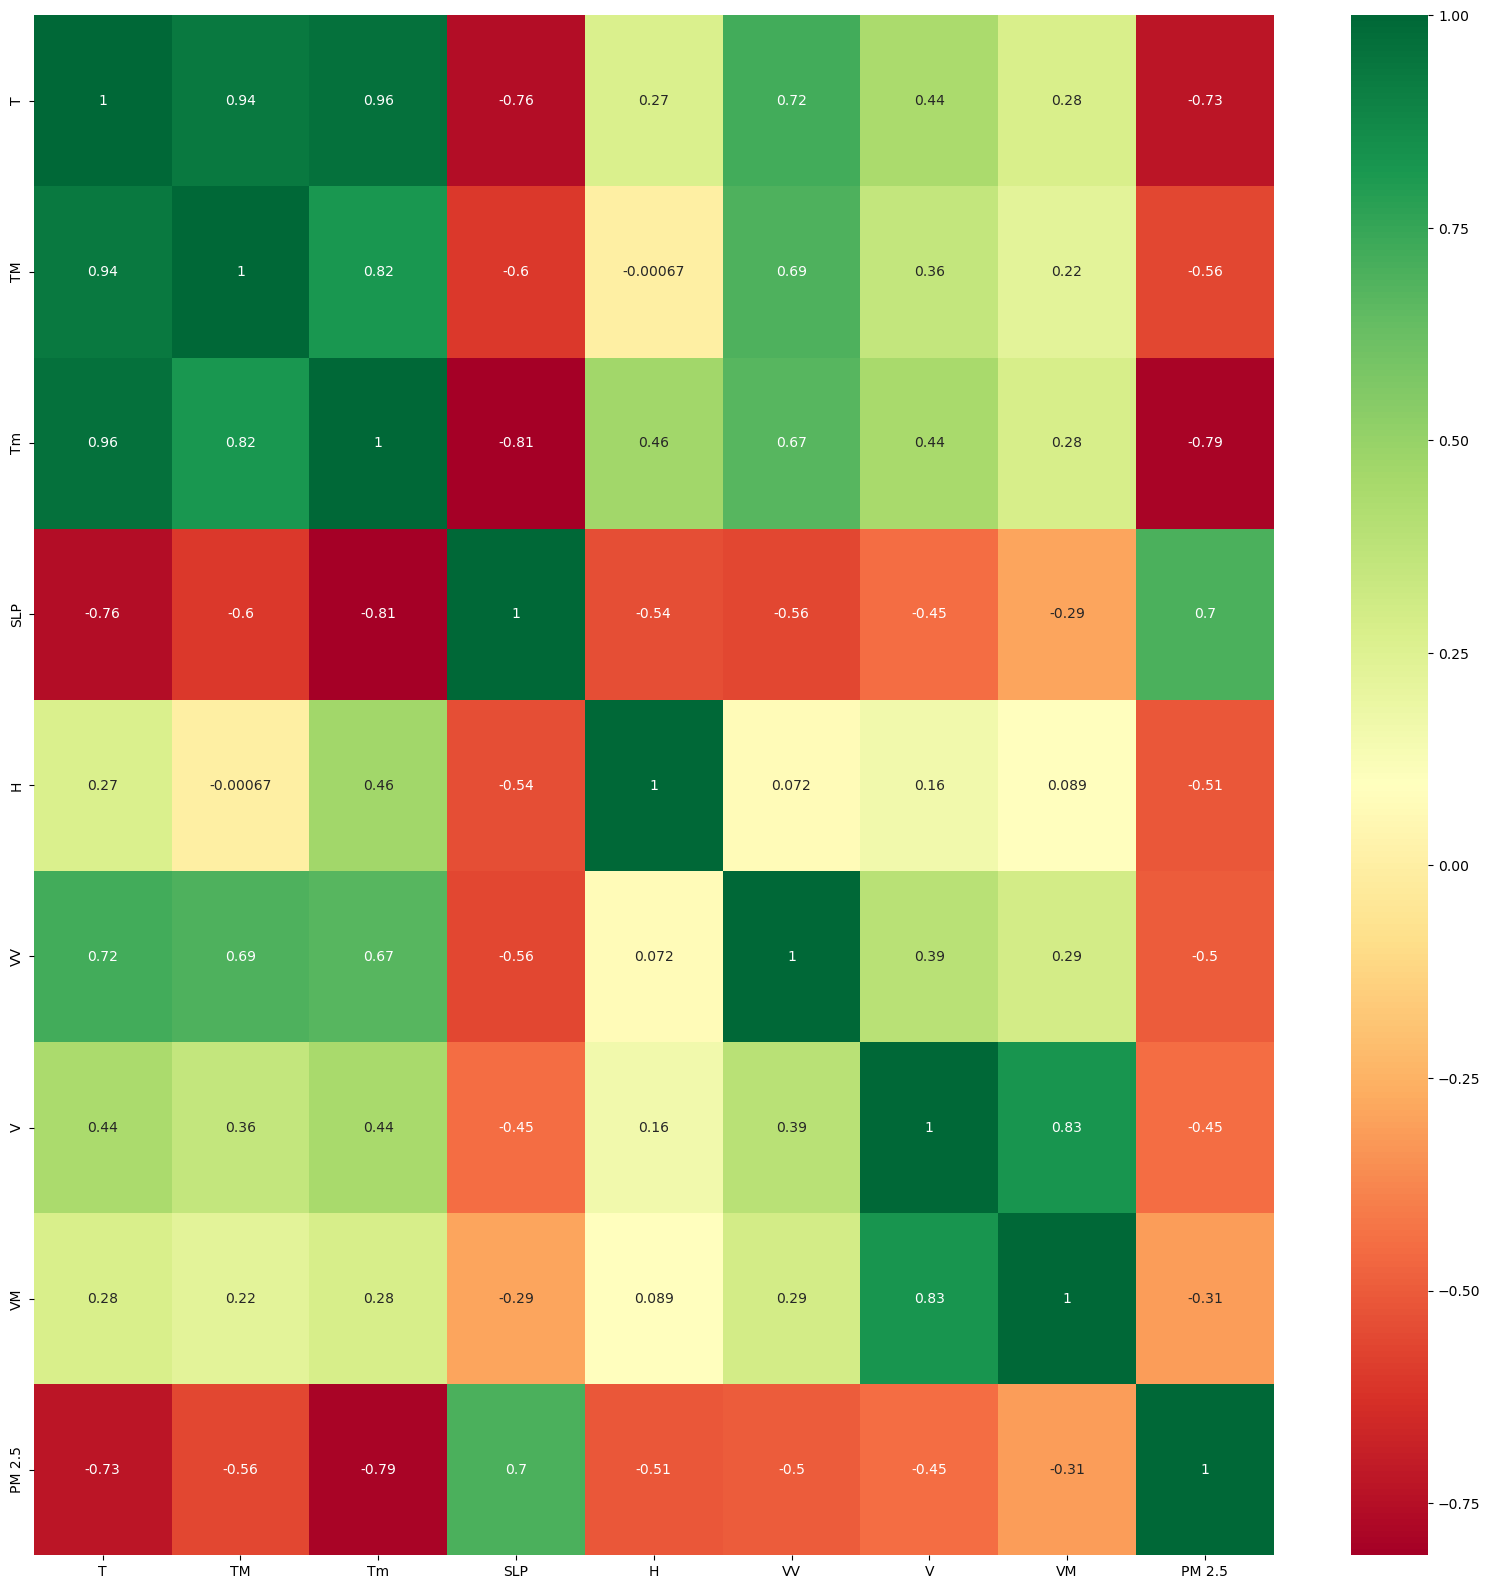

In [16]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
corrmat.index


Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [18]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [19]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,31.3,34.4,28.1,1001.8,74.0,4.0,8.3,14.8
1,30.2,33.6,26.4,1000.9,78.0,3.4,5.6,7.6
2,29.0,30.2,28.2,1000.0,91.0,4.0,4.6,7.6
3,30.5,34.8,26.8,997.6,77.0,4.0,4.6,9.4
4,30.4,32.4,27.6,997.1,79.0,4.0,7.0,9.4


In [20]:
print(model.feature_importances_)

[0.22457872 0.05754879 0.34259115 0.15457718 0.07248355 0.06864904
 0.05054322 0.02902836]


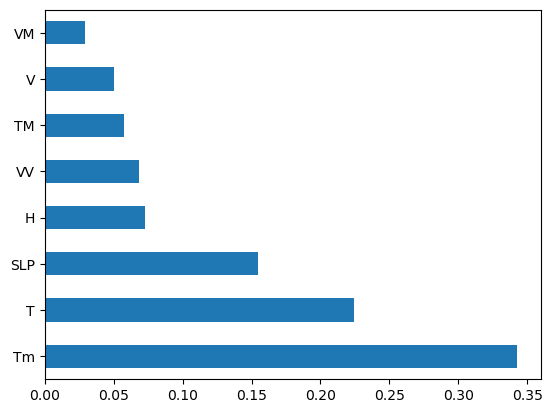

In [21]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### ANN

/Users/saditya/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='PM 2.5', ylabel='Density'>

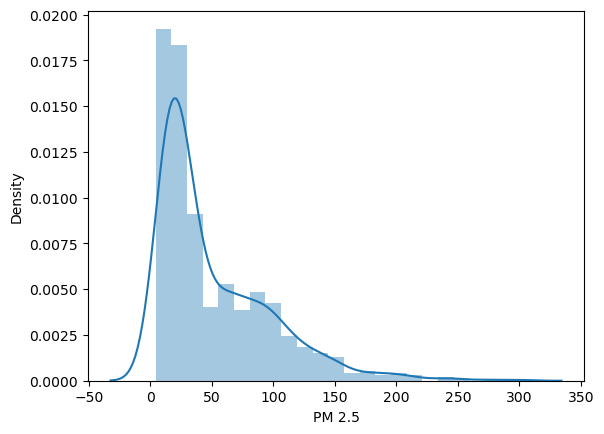

In [22]:
sns.distplot(y)

### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
# Part 2 - Now making the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [25]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


2022-11-10 09:49:39.356641: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-10 09:49:39.357146: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/saditya/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100


2022-11-10 09:49:39.616746: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-10 09:49:39.882252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 1s 19ms/step - loss: 35.9752 - mean_absolute_error: 35.9752 - val_loss: 35.5483 - val_mean_absolute_error: 35.5483
Epoch 2/100
 1/37 [..............................] - ETA: 0s - loss: 45.8900 - mean_absolute_error: 45.8900

2022-11-10 09:49:40.668016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 0s 13ms/step - loss: 33.9707 - mean_absolute_error: 33.9707 - val_loss: 36.1625 - val_mean_absolute_error: 36.1625
Epoch 3/100
37/37 [==============================] - 0s 13ms/step - loss: 33.8606 - mean_absolute_error: 33.8606 - val_loss: 37.0541 - val_mean_absolute_error: 37.0541
Epoch 4/100
37/37 [==============================] - 0s 12ms/step - loss: 35.1039 - mean_absolute_error: 35.1039 - val_loss: 35.4868 - val_mean_absolute_error: 35.4868
Epoch 5/100
37/37 [==============================] - 0s 13ms/step - loss: 33.9554 - mean_absolute_error: 33.9554 - val_loss: 34.4076 - val_mean_absolute_error: 34.4076
Epoch 6/100
37/37 [==============================] - 0s 12ms/step - loss: 32.7014 - mean_absolute_error: 32.7014 - val_loss: 35.1406 - val_mean_absolute_error: 35.1406
Epoch 7/100
37/37 [==============================] - 0s 13ms/step - loss: 30.3744 - mean_absolute_error: 30.3744 - val_loss: 26.2614 - val_mean_absolute_error: 26.2614
Epoc

37/37 [==============================] - 0s 12ms/step - loss: 16.8756 - mean_absolute_error: 16.8756 - val_loss: 17.6999 - val_mean_absolute_error: 17.6999
Epoch 99/100
37/37 [==============================] - 1s 15ms/step - loss: 17.8494 - mean_absolute_error: 17.8494 - val_loss: 17.6383 - val_mean_absolute_error: 17.6383
Epoch 100/100
37/37 [==============================] - 1s 17ms/step - loss: 17.4955 - mean_absolute_error: 17.4955 - val_loss: 17.6493 - val_mean_absolute_error: 17.6493


### Model Evaluation

In [26]:
prediction=NN_model.predict(X_test)

8/8 [==============================] - 0s 5ms/step


2022-11-10 09:50:27.163245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [27]:
y_test

369    21.99
608    51.35
401     7.22
14     27.63
722    12.90
       ...  
211    14.27
310    30.91
165    38.28
188    22.99
337    11.57
Name: PM 2.5, Length: 233, dtype: float64

/Users/saditya/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: ylabel='Density'>

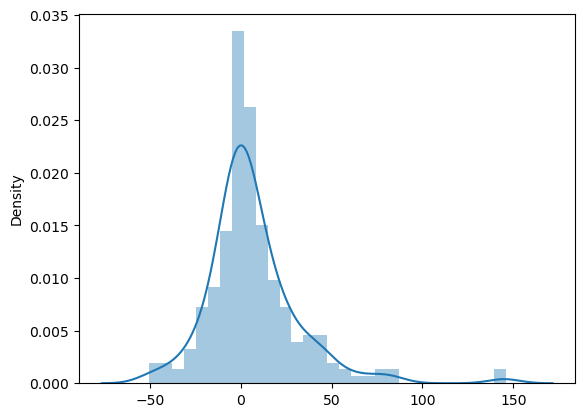

In [28]:
sns.distplot(y_test.values.reshape(-1,1)-prediction)

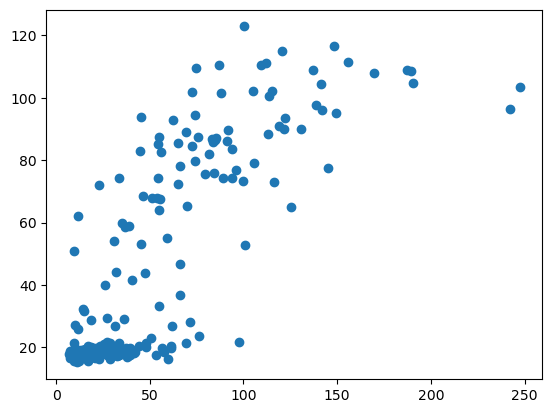

In [29]:
plt.scatter(y_test,prediction)

In [30]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 16.895113342841807
MSE: 698.1330331778599
RMSE: 26.42220719731529


In [31]:
import pickle 

In [32]:
# open a file, where you ant to store the data
file = open('ann.pkl', 'wb')

# dump information to that file
pickle.dump(NN_model, file)

INFO:tensorflow:Assets written to: ram://cb2d17f1-4d25-4402-8a94-3d8671d8b938/assets


ModuleNotFoundError: No module named 'google.colab'